# Figures for the paper

In [1]:
from scipy.integrate import quad
from numpy import *
from matplotlib.pylab import *
import matplotlib as mpl
%matplotlib inline

In [2]:
import PIL.Image as Image
import pickle

In [3]:
rc('text',usetex=True)
rc('text.latex',preamble=r'\usepackage{amssymb}')
rcParams['savefig.pad_inches'] = 0


In [4]:
SMALL_SIZE = 13
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

rc('font',size = BIGGER_SIZE)
rc('axes',titlesize = BIGGER_SIZE)
rc('axes',labelsize = BIGGER_SIZE)
rc('xtick',labelsize = BIGGER_SIZE)
rc('ytick',labelsize = BIGGER_SIZE)
rc('legend',handlelength= 1.0,fontsize = MEDIUM_SIZE)
rc('figure',titlesize = BIGGER_SIZE)

In [5]:
alphabet = []
for letter in range(65, 91):
    alphabet.append(chr(letter))
    
print(alphabet)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [16]:
def getint(x):
    xc = x*1.0
    xc.sort()
    sh = xc.shape[0]
    xmed = xc[sh//2]
    s0= int(sh*(1-.6827)/2)
    s1 = sh-s0
    x0 = xc[s0]
    x1 = xc[s1]
    s0b= int(sh*(1-.95)/2)
    s1b = sh-s0b
    x0b = xc[s0b]
    x1b = xc[s1b]
    return((xmed,x0,x1,x0b,x1b))

In [6]:
def numbering_panels(axs,pos = None,labels=alphabet):
    if pos is None:
        pos = zeros((len(axs),2))
        pos[:,1] = 1-pos[:,1]
        
    for i,ax in enumerate(axs):
        ax.text(pos[i,0],pos[i,1],labels[i],horizontalalignment='right',verticalalignment='top', transform=ax.transAxes)
    return

In [7]:
def plot_trace(data,t,ax=None,c='C0',band= None,label= None,linestyle='-'):
    if ax is None:
        ax = gca()
    vtracso = data*1.0
    vtracso.sort(axis=1)
    sh = vtracso.shape[1]
    nmed = sh//2
    nl1, nv1 = int(sh*0.16),int(sh*(1-0.16))
    nl2, nv2 = int(sh*0.025),int(sh*(1-0.025))

    if label is None:
        ax.plot(t,vtracso[:,nmed],c=c,linestyle=linestyle)
    else:
        ax.plot(t,vtracso[:,nmed],c=c,linestyle=linestyle,label=label)
        
    if band == 0:
        pass
    elif band == 1:
        ax.fill_between(t,vtracso[:,nl1],vtracso[:,nv1],color=c,alpha=0.5)
    elif band ==2:
        ax.fill_between(t,vtracso[:,nl2],vtracso[:,nv2],color=c,alpha=0.5)
    else:
        ax.fill_between(t,vtracso[:,nl1],vtracso[:,nv2],color=c,alpha=0.2)
        ax.fill_between(t,vtracso[:,nl1],vtracso[:,nv1],color=c,alpha=0.5)
    return(ax)

# Scale bars
def scalebar(ax,x0,y0,dx,dy,xlab = '', ylab = '', color = 'k'):
    xs = x0+linspace(0,dx,4)
    ax.vlines(x0,y0,y0+dy,color = color)
    ax.plot(xs,xs*0+y0,c = color)
    ax.text(x0,y0+dy*.3,ylab,horizontalalignment="right")   
    ax.text(x0+dx/2,y0-dy*0.02,xlab,verticalalignment="top",horizontalalignment="center")     

def running_mean(x, N, padding = "valid"):
    if padding =="same":
        N2 = N//2
        Nf = float(N)
        cumsumt = cumsum(concatenate((zeros(1),x,zeros(N-1))))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / Nf
        runmean[-N+1:] = runmean[-N+1:]*Nf/(arange(Nf-1,0,-1))
    elif padding =="valid":
        cumsumt = cumsum(insert(x, 0, 0))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / float(N)
    return(runmean)
def running_std(x, N, padding = "valid"):
    if padding =="same":
        N2 = N//2
        Nf = float(N)
        cumsumt = cumsum(concatenate((zeros(1),x,zeros(N-1))))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / Nf
        runmean[-N+1:] = runmean[-N+1:]*Nf/(arange(Nf-1,0,-1))
        cumsumt = cumsum(concatenate((zeros(1),x*x,zeros(N-1))))
        runstd = (cumsumt[N:] - cumsumt[:-N]) / Nf
        runstd[-N+1:] = runmean[-N+1:]*Nf/(arange(Nf-1,0,-1))
        runstd = sqrt(runstd-runmean**2)
    elif padding =="valid":
        cumsumt = cumsum(insert(x, 0, 0))
        runmean = (cumsumt[N:] - cumsumt[:-N]) / float(N)
        
        cumsumt = cumsum(insert(x**2, 0, 0))
        runstd = (cumsumt[N:] - cumsumt[:-N]) / float(N)
        runstd = sqrt(runstd-runmean**2)
    return(runstd)

In [112]:
#Jupyters: Proper Spine Model - Inhibition.ipynb
with open("../SpineModel/dis_baselineB_disx2.pickle","rb") as f:
    vavgDiS,mesDiS,vtracsDiS,vtracsDDiS,vtracsSDiS,CtracsDiS,_,_ = pickle.load(f)

with open("../SpineModel/dis_baselineB_spsx2.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs,me2,me3 = pickle.load(f)

with open("../SpineModel/All_baseline_datasetx2.pickle","rb") as f:
    vavgT,mesT,vtracsT,vtracsDT,vtracsST,CtracsT,me2T,_,dataT = pickle.load(f)

# Jupyters: Proper Spine Model - Depolarizing inhibitionx2
with open("../SpineModel/SPS_InhVoltage_datasetC_x2.pickle","rb") as f:
            mVsDiSI,mVsshI = pickle.load(f) 

with open("../SpineModel/SPS_Voltagedistx1e5_tempx2.pickle","rb") as f:
            mVs = pickle.load(f) 
        
with open("../SpineModel/SPS_Voltagedistx1e5_tempx2.pickle","rb") as f:
            mVb = pickle.load(f) 
with open("../SpineModel/SPS_InhVoltagedistx1e5x2.pickle","rb") as f:
            mVbI = pickle.load(f) 
        
        


n = 800
sel = mVb[:,-2] == 1
s1 = arange(mVs.shape[0])[sel]
s2 = arange(mVs.shape[0])[~sel]
xt,yt = mVb[s1,-1],mVb[s1,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
xtSiS = running_mean(xt,n)
#yt2 = running_std(yt,n)
ytSiS = running_mean(yt,n)

xt,yt = mVb[s2,-1],mVb[s2,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
nDiS = 200
xtDiS = running_mean(xt,nDiS)
#yt2 = running_std(yt,n)
ytDiS = running_mean(yt,nDiS)

xt,yt = mVbI[:,-1],mVbI[:,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
xtspI = running_mean(xt,n)
ytspI = running_mean(yt,n)

xt,yt = mVbI[:,-1],mVbI[:,5]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
xtshI = running_mean(xt,n)
#yt2 = running_std(yt,n)
ytshI = running_mean(yt,n)


In [113]:
modeldt = 0.05
bands = 1

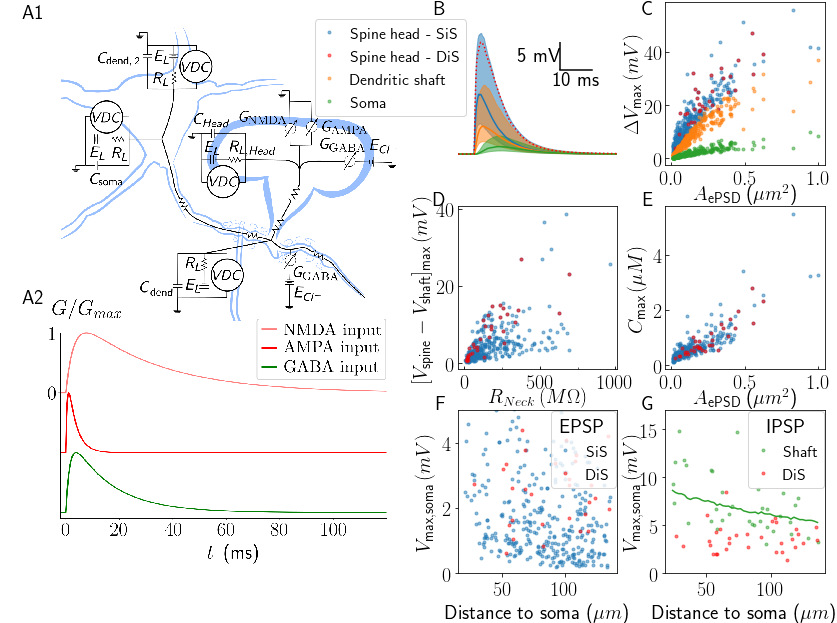

In [114]:
im = Image.open('../Neuron_persp4.png')
height = im.size[1]
im = np.array(im).astype(np.float) / 255
fig = figure(figsize=(14,10.5))
gs = mpl.gridspec.GridSpec(3, 4,  wspace=0.3, hspace=.25) # 2x3 grid

ax0 = fig.add_subplot(gs[:, 0:2]) # first full col
ax1 = fig.add_subplot(gs[0, 2]) # first row, second col
ax3 = fig.add_subplot(gs[0, 3]) # first row, third col
ax2 = fig.add_subplot(gs[1, 2]) # 2nd row, second col
ax4 = fig.add_subplot(gs[1, 3]) # 2nd row, 3rd col
axl1 = fig.add_subplot(gs[2, 2]) # 3nd row, second col
axl2 = fig.add_subplot(gs[2, 3]) # 3nd row, 3rd col

ax0.imshow(im)
ax0.set_axis_off()


# Plots in fig EPSP
s1 = dataT['nPSD']==1.0
s2 = dataT['nPSD']==2.0

plot_trace(vtracsT[:,s1],arange(vtracsT.shape[0])*modeldt-100+5,ax1,c='C0',band = bands)
plot_trace(vtracsDT[:,s1],arange(vtracsDT.shape[0])*modeldt-100+5,ax1,c='C1',band = bands)
plot_trace(vtracsST[:,s1],arange(vtracsST.shape[0])*modeldt-100+5,ax1,c='C2',band = bands)
plot_trace(vtracsT[:,s2],arange(vtracsT.shape[0])*modeldt-100+5,ax1,c='r',band = 0,linestyle=':')





# Plot in fig Delta V - V_dend
s0 = dataT['A2']>0
ax2.plot(abs(mesT[:,0]),mesT[:,1]-mesT[:,2],'.',label="Spine head",alpha=0.5)
ax2.plot(abs(mesT[s0,0]),mesT[s0,1]-mesT[s0,2],'r.',label="Spine head",alpha=0.5)

# Plot in fig Calcium
ax4.plot(abs(dataT['A1']),mesT[:,4],'.',label="Spine head",alpha=0.5)
ax4.plot(abs(dataT['A1'][s0]),mesT[s0,4],'r.',label="Spine head",alpha=0.5)

# Plot in fig Delta V max
EL0 = -70
ax3.plot(abs(dataT['A1']),mesT[:,1],'C0.',label="Spine head - SiS",alpha=0.5)
ax3.plot(abs(dataT['A1'][s0]),mesT[s0,1],'r.',label="Spine head - DiS",alpha=0.5)
ax3.plot(abs(dataT['A1']),me2T[:,2]-EL0,'C1.',label="Dendritic shaft",alpha=0.5)
ax3.plot(abs(dataT['A1']),mesT[:,3],'C2.',label="Soma",alpha=0.5)
#ax3.plot(abs(mesT[s0,-3]/1e-3),mesT[s0,3],'r.',label="Spine head",alpha=0.5)


mVav = mVsshI[:,2].mean()
axl2.plot(mVsshI[:,-1],mVsshI[:,2],'C2.',alpha=0.5,label='Shaft')#,label='Axo-dendritic')

axl2.plot(mVsDiSI[:,-1],mVsDiSI[:,2],'r.',alpha=0.5,label='DiS')#,label='Axo-spinous')


axl2.set_ylabel('$V_{\sf max, soma}\, (mV)$')
axl2.set_xlabel('Distance to soma ($\mu m$)')


xt = linspace(min(mVsshI[:,-1]),max(mVsshI[:,-1]))
axl2.plot(xt,interp(xt,xtshI,ytshI),'C2')
#axl2.plot(xt,interp(xt,xtspI,ytspI),'r')

#axl2.plot(xt,yt,'r',label='DiS')
#axl2.legend(title='Excitation',loc=(0.5,0.65))
#axl2.set_ylabel('$V_{\max}$ in soma',rotation = 0)

#axl2.fill_between(xt,yt+yt2,yt-yt2,color = 'r',alpha=0.7,band = 0)


s1v = dataT['nPSD']==1.0
s2v = dataT['nPSD']==2.0
axl1.plot(dataT['Dss'][s1v],mesT[s1v,3],'C0.',alpha=0.5,label='SiS')
axl1.plot(dataT['Dss'][s2v],mesT[s2v,3],'r.',alpha=0.5,label='DiS')

axl1.set_ylabel('$V_{\sf max, soma}\, (mV)$')
axl1.set_xlabel('Distance to soma ($\mu m$)')

xt = linspace(min(dataT['Dss']),max(dataT['Dss']))
#axl1.plot(xt,interp(xt,xtDiS,ytDiS),'r')
#axl1.plot(xt,interp(xt,xtSiS,ytSiS),'C0')#
#axl1.plot(xt,xt*0+getint(ytSiS)[0],'C0')

#axl2.set_ylabel('$V_{\max}$ in soma',rotation = 0)

#axl2.fill_between(xt,yt+yt2,yt-yt2,color = 'r',alpha=0.7,band = 0)


# Accesories

scalebar(ax1,52,-55,10,5,xlab = '10 ms', ylab = '5 mV ', color = 'k')
ax1.set_axis_off()
ax2.set_xlabel("$R_{Neck}\, (M\Omega)$")
ax2.set_ylabel("$[V_{\sf spine}-V_{\sf shaft}]_{\sf max}\, (mV)$")
ax4.set_xlabel("$A_{\sf ePSD}$ ($\mu m^2$)")
ax4.set_ylabel("$C_{\sf max}\, (\mu M)$")
#ax3.set_xlabel("- $I_{s,max}$(pA)")
ax3.set_xlabel("$A_{\sf ePSD}$ ($\mu m^2$)")

ax3.set_ylabel("$\Delta V_{\sf max}\, (mV)$")
ax3.tick_params(direction="in")
ax4.tick_params(which='both',direction="in")
ax2.tick_params(direction="in")
ax3.set_xticks(ticks=arange(0,1.5,0.5))
ax4.set_xticks(ticks=arange(0,1.5,0.5))
ax2.set_xticks(ticks=arange(0,600,200))

ax2.xaxis.set_minor_locator(FixedLocator(arange(0,4000,250)))
ax2.xaxis.set_major_locator(FixedLocator(arange(0,4000,500)))
ax2.xaxis.set_tick_params(which='minor',direction='in')
#ax4.xaxis.set_label_coords(0.5,-0.12)
ax2.yaxis.set_label_coords(-.15,0.5)
ax3.yaxis.set_label_coords(-.13,0.5)
ax3.xaxis.set_label_coords(0.5,-0.12)
ax2.xaxis.set_label_coords(0.5,-0.12)
ax4.xaxis.set_label_coords(0.5,-0.12)
axl2.yaxis.set_label_coords(-.13,0.5)
axl1.yaxis.set_label_coords(-.13,0.5)

#ax4.yaxis.set_label_coords(-.15,0.5)

ax3.legend(loc = (-2.2,0.3))
axl1.legend(title='EPSP',loc=(0.58,0.52))
axl2.legend(title='IPSP',loc=(0.52,0.52))

ax1.set_xlim(20,70)
ax1.set_ylim(-72,-43)
axl1.set_ylim(0,5)
axl2.set_ylim(0,17)

#ax4.set_ylim(0,4.5)
axs = [ax0,ax1,ax3,ax2,ax4,axl1,axl2,ax0]
pos = zeros((len(axs),2))
pos[:,1] = 1-pos[:,1]
pos[:3,1] = 1.02
pos[0,1] = 1.01

pos[3:,1] = 1.1
pos[1:,0] = -0.07
pos[-1,:] = (0.,0.5)
numbering_panels(axs,pos,labels=['A1','B','C','D','E','F','G','A2'])
savefig("Figure_Model_1bx2.png",dpi = 300, tight_layout = True)

#avefig("Figure_Model_1bx2.pdf",dpi = 300, tight_layout = True)



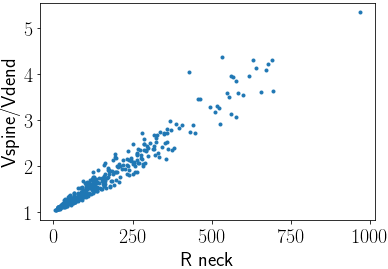

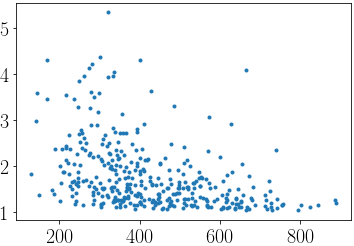

In [127]:
plot(dataT['Rneck'],mesT[:,1]/mesT[:,2],'.')
getint(mesT[:,1]),getint(mesT[:,2])
xlabel('R neck')
ylabel('Vspine/Vdend')

figure()
plot(dataT['maxDhead'],mesT[:,1]/mesT[:,2],'.')


In [12]:
mVsshI[:,2].std()/mVsshI[:,2].mean(),mVsDiSI[:,2].std()/mVsDiSI[:,2].mean()


(0.4146479698212903, 0.39235681560963576)

Text(0, 0.5, 'Vspine')

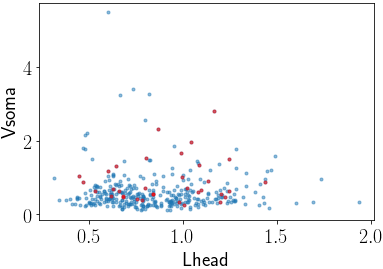

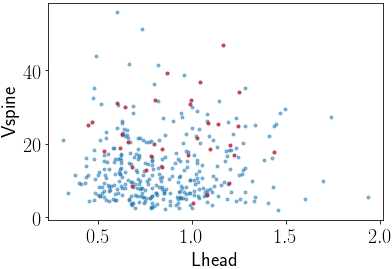

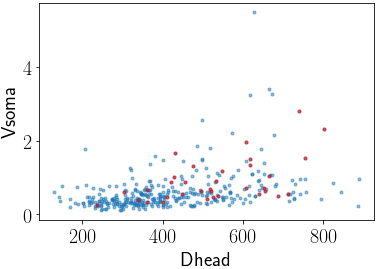

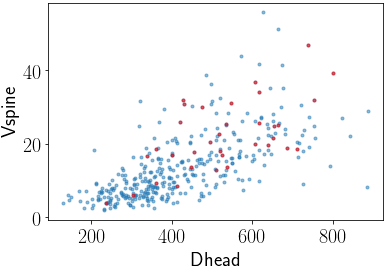

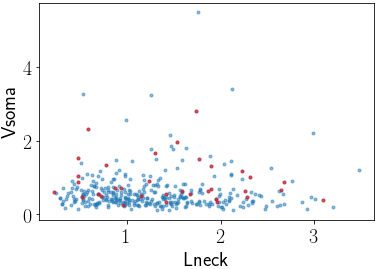

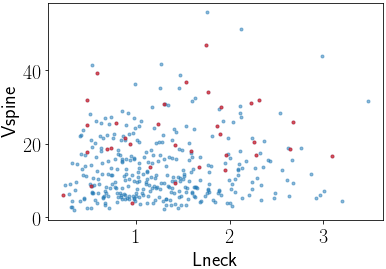

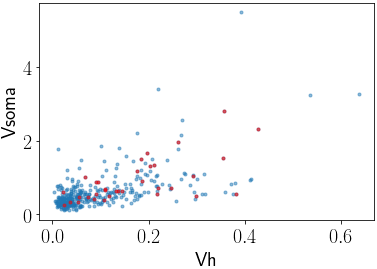

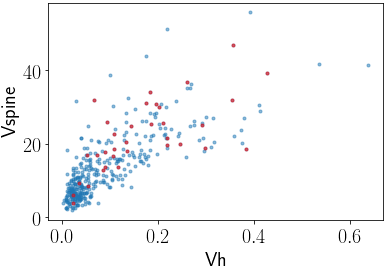

In [183]:
plot(abs(dataT['Lhead']),mesT[:,4],'.',label="Spine head",alpha=0.5)
plot(abs(dataT['Lhead'][s0]),mesT[s0,4],'r.',label="Spine head",alpha=0.5)
xlabel('Lhead')
ylabel('Vsoma')
figure()
# Plot in fig Delta V max
EL0 = -70
plot(abs(dataT['Lhead']),mesT[:,1],'C0.',label="Spine head - SiS",alpha=0.5)
plot(abs(dataT['Lhead'][s0]),mesT[s0,1],'r.',label="Spine head - DiS",alpha=0.5)
xlabel('Lhead')
ylabel('Vspine')

figure()
plot(abs(dataT['maxDhead']),mesT[:,4],'.',label="Spine head",alpha=0.5)
plot(abs(dataT['maxDhead'][s0]),mesT[s0,4],'r.',label="Spine head",alpha=0.5)
xlabel('Dhead')
ylabel('Vsoma')
figure()
# Plot in fig Delta V max
EL0 = -70
plot(abs(dataT['maxDhead']),mesT[:,1],'C0.',label="Spine head - SiS",alpha=0.5)
plot(abs(dataT['maxDhead'][s0]),mesT[s0,1],'r.',label="Spine head - DiS",alpha=0.5)
xlabel('Dhead')
ylabel('Vspine')

figure()
key = 'Lneck'
plot(abs(dataT[key]),mesT[:,4],'.',label="Spine head",alpha=0.5)
plot(abs(dataT[key][s0]),mesT[s0,4],'r.',label="Spine head",alpha=0.5)
xlabel(key)
ylabel('Vsoma')
figure()
# Plot in fig Delta V max
EL0 = -70
plot(abs(dataT[key]),mesT[:,1],'C0.',label="Spine head - SiS",alpha=0.5)
plot(abs(dataT[key][s0]),mesT[s0,1],'r.',label="Spine head - DiS",alpha=0.5)
xlabel(key)
ylabel('Vspine')
figure()
key = 'Vh'
plot(abs(dataT[key]),mesT[:,4],'.',label="Spine head",alpha=0.5)
plot(abs(dataT[key][s0]),mesT[s0,4],'r.',label="Spine head",alpha=0.5)
xlabel(key)
ylabel('Vsoma')
figure()
# Plot in fig Delta V max
EL0 = -70
plot(abs(dataT[key]),mesT[:,1],'C0.',label="Spine head - SiS",alpha=0.5)
plot(abs(dataT[key][s0]),mesT[s0,1],'r.',label="Spine head - DiS",alpha=0.5)
xlabel(key)
ylabel('Vspine')

63.4022634921148 4.74930115446857


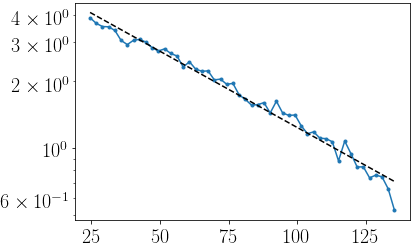

In [169]:
from scipy.stats import linregress

xt = linspace(min(mVsshI[:,-1]),max(mVsshI[:,-1]))
yt = interp(xt,xtshI,ytshI)
miny = min(yt)*.9
plot(xt,yt-miny,'.-')
yt = log(yt-miny)
slope, intercept, r_value, p_value, std_err = linregress(xt,yt)
plot(xt,exp(xt*slope+intercept),'k--')
print(-1./slope,miny)
yscale('log')

61.30218601999044 1.5619718404203844


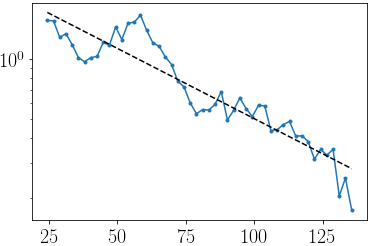

In [174]:
#xt = linspace(min(xtSis),max(xtSis))
yt = interp(xt,xtSiS,ytSiS)
miny = min(yt)*.9
plot(xt,yt-miny,'.-')
yt = log(yt-miny)
slope, intercept, r_value, p_value, std_err = linregress(xt,yt)
plot(xt,exp(xt*slope+intercept),'k--')
print(-1./slope,miny)
yscale('log')

In [41]:
def gradient_image(ax, extent, direction=0.3, cmap_range=(0, 1), **kwargs):
    """
    Draw a gradient image based on a colormap.

    Parameters
    ----------
    ax : Axes
        The axes to draw on.
    extent
        The extent of the image as (xmin, xmax, ymin, ymax).
        By default, this is in Axes coordinates but may be
        changed using the *transform* kwarg.
    direction : float
        The direction of the gradient. This is a number in
        range 0 (=vertical) to 1 (=horizontal).
    cmap_range : float, float
        The fraction (cmin, cmax) of the colormap that should be
        used for the gradient, where the complete colormap is (0, 1).
    **kwargs
        Other parameters are passed on to `.Axes.imshow()`.
        In particular useful is *cmap*.
    """
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, extent=extent, interpolation='bicubic',
                   vmin=0, vmax=1, **kwargs)
    return im


def gradient_bar(ax, x, y, width=0.5, bottom=0, cmap = cm.Blues_r):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=cmap, cmap_range=(0,1.0),direction=1)

#plot(randn(5))
#ax = gca()
#ax.set(autoscale_on=False)
#gradient_bar(ax,[0],[0],3.,1.0)
#ax.set_aspect('auto')  

AMPA 1.0750556815368328
3.8376418216567427


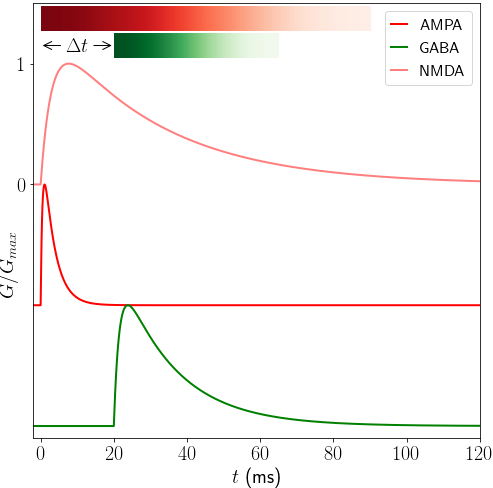

In [42]:
figure(figsize=(8,8))

xs = linspace(0,120,1000)
ton, toff = (0.5,3.0)
trise = ton*toff/(ton-toff)*log(ton/toff)
print('AMPA',trise)
yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
plot(concatenate(([-10],xs)),concatenate(([0],yglu))-1,'r-',linewidth= 2,label='AMPA')
ax = gca()
ax.set(autoscale_on=False)

ton, toff = (1.5,15.0)
trise = ton*toff/(ton-toff)*log(ton/toff)
print(trise)
ygaba = exp(-xs/toff)-exp(-xs/ton); ygaba= ygaba/max(ygaba)
plot(concatenate(([-10],xs+20)),concatenate(([0],ygaba))-1-1,'g-',linewidth= 2,label='GABA')
gradient_bar(ax,[20],[1.25],3*toff,1.05,cmap = cm.Greens_r)
ax.set_yticks(ticks=array([0,1.]))

ton, toff = (3,30.0)
yglu = exp(-xs/toff)-exp(-xs/ton); yglu = yglu/max(yglu)
plot(concatenate(([-10],xs)),concatenate(([0],yglu)),'r-',linewidth= 2,alpha=0.5,label='NMDA')
gradient_bar(ax,[0],[1.27+.2],3*toff,1.27,cmap = cm.Reds_r)


ax.set_aspect('auto')

ax.set_xlim(-2,120)
ax.set_ylim(-2.1,1.5)
ax.set_xlabel('$t$ (ms)')
ax.set_ylabel('$G/G_{max}$')
ax.yaxis.set_label_coords(-0.03,0.4)
ax.legend()
ax.annotate('$\Delta t$',xy = (7,1.1))
ax.annotate('',xy = (6,1.15),xytext = (0,1.15),arrowprops=dict(arrowstyle="<-"))
ax.annotate('',xy = (14,1.15),xytext = (20,1.15),arrowprops=dict(arrowstyle="<-"))

savefig('conductances3.pdf')

In [61]:
#Jupyter notebook: Proper Spine Model - Inhibition.ipynb
data = {}

with open("../SpineModel/dis_baselinex2.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_baseline"] = [vtracs,Ctracs]
with open("../SpineModel/dis_ga_glu05x2.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gaglu"] = [vtracs,Ctracs]
with open("../SpineModel/dis_glu_ga05x2.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["dis_gluga"] = [vtracs,Ctracs]
#with open("sis_ga_glu.pickle","rb") as f:
#    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["sis_gaglu"] = [vtracs,Ctracs]
#with open("sis_glu_ga.pickle","rb") as f:
#    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs = pickle.load(f)
data["sis_gluga"] = [vtracs,Ctracs]

with open("inhibition_disx2.pickle","rb") as f:
    tdels,inhtimDis,_,tauDis = pickle.load(f)

# Jupyter notebook: Proper Spine Model - Inhibition outside
with open("inhibition_sis_01x2.pickle","rb") as f:
    tdels,inhtimSis,_,tauSis = pickle.load(f)


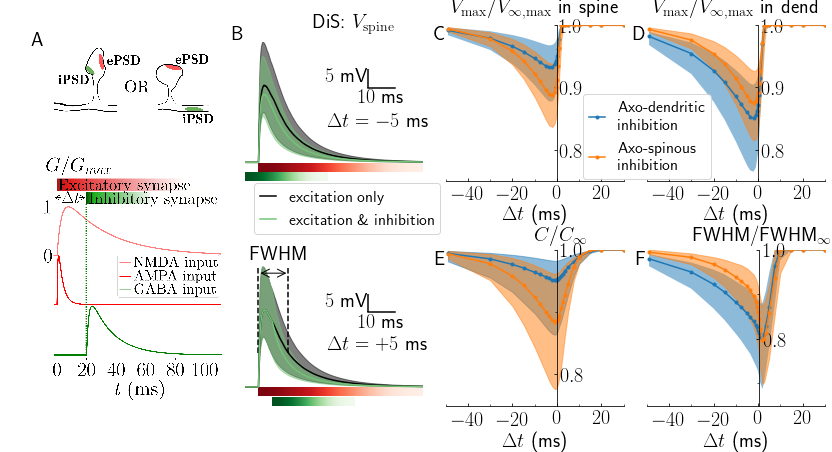

In [108]:
#height = im.size[1]
#im = np.array(im).astype(np.float) / 255
im = Image.open('../spine-inh_sketch_bothk.png')
height = im.size[1]
im = np.array(im).astype(np.float) / 255

fig = figure(figsize=(14,7))
gs = mpl.gridspec.GridSpec(6,8,  wspace=0.3, hspace=11) # 2x3 grid
ax0 = fig.add_subplot(gs[:, :2]) # first full col

ax1 = fig.add_subplot(gs[:3, 2:4]) # first row, second col
ax3 = fig.add_subplot(gs[3:, 2:4]) # 2nd row, second col

ax2 = fig.add_subplot(gs[:3, 4:6]) # first row, third col
ax4 = fig.add_subplot(gs[3:, 4:6]) # first full col
ax0b = fig.add_subplot(gs[3:, 6:]) # 2nd row, 3rd col
ax5 = fig.add_subplot(gs[:3, 6:]) # 2nd row, 3rd col

# Sketch
ax0.imshow(im)
ax0.set_axis_off()

# Fig EPSP GABA-Glu dt = -5ms
vtracs = data["dis_baseline"][0]+70
plot_trace(vtracs,arange(vtracs.shape[0])*modeldt-100,ax1,c='k',band = bands)

vtracs = data["dis_gaglu"][0]+70
cG = cm.Greens(0.5)
plot_trace(vtracs,arange(vtracs.shape[0])*modeldt-100,ax1,c=cG,band = bands)
ax1.set_xlim(15,80)
ax1.set_axis_off()

# Fig EPSP Glu-GABA dt = +5ms

vtracs = data["dis_baseline"][0]+70
#plot_trace(vtracs,arange(vtracs.shape[0])*.1-200+10,ax3,c='k')
#vtracs = data["dis_gaglu"][1]
plot_trace(vtracs,arange(vtracs.shape[0])*modeldt-100,ax3,c='k',band = bands,label='excitation only')

#vtracs = data["dis_baseline"][1]
#plot_trace(vtracs,arange(vtracs.shape[0])*.1-200+10,ax3,c='k')
vtracs = data["dis_gluga"][0]+70
plot_trace(vtracs,arange(vtracs.shape[0])*modeldt-100,ax3,c=cG,band = bands,label='excitation \& inhibition')
ax3.set_xlim(15,80)
#ax1.set_ylim(-67,-20)
ax3.set_axis_off()
#plot_trace(vtracsD,arange(vtracsD.shape[0])*.1-200+10,ax2,c='C1')
#plot_trace(vtracsS,arange(vtracsS.shape[0])*.1-200+10,ax2,c='C2')
#ax3.text(50,1,"$Ca^{2+}$")

vm,sl,sv = inhtimSis[:,0],inhtimSis[:,1],inhtimSis[:,2]
ax2.plot(tdels,vm,'C0.-',label='Axo-dendritic\n inhibition')
ax2.fill_between(tdels,sl,sv,alpha=0.5)

vm,sl,sv = inhtimSis[:,3*5],inhtimSis[:,3*5+1],inhtimSis[:,3*5+2]
ax4.plot(tdels,vm,'C0.-',label='Axo-dendritic\n inhibition')
ax4.fill_between(tdels,sl,sv,alpha=0.5,color='C0')
#ax2.set_axis_off()

vm,sl,sv = inhtimDis[:,0],inhtimDis[:,1],inhtimDis[:,2]
ax2.plot(tdels,vm,'C1.-',label='Axo-spinous\n inhibition')
ax2.fill_between(tdels,sl,sv,color='C1',alpha=0.5)

vm,sl,sv = inhtimDis[:,3*5],inhtimDis[:,3*5+1],inhtimDis[:,3*5+2]
ax4.plot(tdels,vm,'C1.-',label='Axo-spinous\n inhibition')
ax4.fill_between(tdels,sl,sv,color='C1',alpha=0.5)

vm,sl,sv = inhtimSis[:,1*5],inhtimSis[:,1*5+1],inhtimSis[:,1*5+2]
ax5.plot(tdels,vm,'C0.-',label='Axo-dendritic\n inhibition')
ax5.fill_between(tdels,sl,sv,alpha=0.5)

vm,sl,sv = inhtimDis[:,1*5],inhtimDis[:,1*5+1],inhtimDis[:,1*5+2]
ax5.plot(tdels,vm,'C1.-',label='Axo-spinous\n inhibition')
ax5.fill_between(tdels,sl,sv,color='C1',alpha=0.5)


#ax0btwin = ax0b.twinx()
#vm,sv = tauDis[:,2],tauDis[:,3]
#ax0btwin.plot(tdels,vm,'C1.-',label='In spine head')
##ax4twin.fill_between(tdels,vm+sv,vm-sv,color='C1',alpha=0.5)

vm,sl,sv = tauSis[:,0],tauSis[:,1],tauSis[:,2]
ax0b.plot(tdels,vm,'C0.-',label='Axo-dendritic\n inhibition')
ax0b.fill_between(tdels,sl,sv,alpha=0.5)

vm,sl,sv = tauDis[:,0],tauDis[:,1],tauDis[:,2]
ax0b.plot(tdels,vm,'C1.-',label='Axo-spinous\n inhibition')
ax0b.fill_between(tdels,sl,sv,color='C1',alpha=0.5)





ax2.set_ylim(0.75,1.0)
ax5.set_ylim(0.75,1.0)


ax2.spines['left'].set_color('none')
#ax2.spines['bottom'].set_color('none')
ax2.set_yticks(ticks=[0.8,0.9,1.0])
#ax2.set_xticks(ticks=arange(-50,70,20))
ax2.xaxis.set_minor_locator(FixedLocator(arange(-50,70,20)))
ax2.xaxis.set_major_locator(FixedLocator(arange(-40,60,20)))
ax2.tick_params(axis='x', pad = 10)
ax2.yaxis.tick_right()
# Eliminate upper and right axes
ax2.spines['right'].set_position(('data',0.0))
ax2.spines['top'].set_position(('data',0.75))
#ax2.annotate('$V/V_{\\varnothing}$\n in spine',xy = (20,0.9))
ax2.spines['top'].set_color('none')
#ax2.xaxis.set_visible(False)
#ax2.set_ylim(.68,1.)


ax5.spines['left'].set_color('none')
#ax5.spines['bottom'].set_color('none')
ax5.spines['top'].set_color('none')
ax5.set_yticks(ticks=[0.8,0.9,1.0])
#ax2.set_xticks(ticks=arange(-50,70,20))
ax5.xaxis.set_minor_locator(FixedLocator(arange(-50,70,20)))
ax5.xaxis.set_major_locator(FixedLocator(arange(-40,60,20)))
ax5.tick_params(axis='x', pad = 10)
ax5.yaxis.tick_right()
# Eliminate upper and right axes
ax5.spines['right'].set_position(('data',0.0))
ax5.spines['top'].set_position(('data',0.75))
ax5.spines['top'].set_color('none')
#ax5.xaxis.set_visible(False)

ax4.spines['left'].set_color('none')
#ax4.spines['bottom'].set_color('none')
ax4.set_yticks(ticks=[0.6,0.8,1.0])
#ax4.set_xticks(ticks=[0])
ax4.yaxis.set_minor_locator(FixedLocator(arange(0.7,1.1,0.2)))
#ax4.xaxis.set_major_locator(FixedLocator(arange(-40,60,20)))

ax4.yaxis.tick_right()
#ax4.xaxis.tick_top()

# Eliminate upper and right axes
ax4.spines['right'].set_position(('data',0.0))
ax4.spines['bottom'].set_position(('data',0.750))
ax4.spines['top'].set_color('none')
#ax4.xaxis.set_visible(False)
#ax4.xaxis.tick_top()
ax4.set_ylabel('$C/C_{\infty}$', rotation = 0)
ax4.set_ylim(0.75,1.0)

ax0b.spines['top'].set_color('none')
ax0b.spines['left'].set_color('none')
#ax0b.spines['bottom'].set_color('none')
ax0b.yaxis.set_minor_locator(FixedLocator(arange(3,11,2)))
ax0b.yaxis.set_major_locator(FixedLocator(arange(4,12,2)))

#ax2.set_xticks(ticks=arange(-50,70,20))
#ax0b.tick_params(axis='x', pad = 10)
ax0b.yaxis.tick_right()
#ax0b.xaxis.tick_top()
# Eliminate upper and right axes
ax0b.spines['right'].set_position(('data',0.65))
#ax0b.spines['top'].set_color('none')
#ax0b.xaxis.set_visible(False)
ax0b.set_ylabel('FWHM/FWHM$_\infty$', rotation = 0)


ax1.set(autoscale_on=False)
ax3.set(autoscale_on=False)
ax1.set(ylim=(-5,36.8),autoscale_on=False)
ax3.set(ylim=(-5,36.8),autoscale_on=False)
#ax1.plot(linspace(50,100),linspace(10,20)*0+2)
gradient_bar(ax1,[20],[-0.3],60.,-2.5,cmap = cm.Reds_r)
gradient_bar(ax1,[15],[-2.8],30.,-5,cmap = cm.Greens_r)

gradient_bar(ax3,[20],[-0.3],60.,-2.5,cmap = cm.Reds_r)
gradient_bar(ax3,[25],[-2.8],30.,-5.0,cmap = cm.Greens_r)

ax1.set_aspect('auto')
ax3.set_aspect('auto')
scalebar(ax3,60,20,10,5,'$10$ ms','$5$ mV')
scalebar(ax1,60,20,10,5,'$10$ ms','$5$ mV')

#gs.tight_layout(fig, rect=[.5,.5, 1, 1], h_pad=0.)#pad=0.4, w_pad=0.5, h_pad=4.0)
#print(xy1,sel)
#subplot_tool()

ax0b.set_xlabel('$\Delta t$ (ms) ')
ax4.set_xlabel('$\Delta t$ (ms) ')
ax5.set_xlabel('$\Delta t$ (ms) ')
ax2.set_ylabel('$V_{\max}/V_{\infty,\max}$ in spine', rotation = 0)
ax5.set_ylabel('$V_{\max}/V_{\infty,\max}$ in dend',rotation = 0)

ax4.yaxis.set_label_coords(0.65,1.01)
ax0b.yaxis.set_label_coords(0.65,1.01)
ax2.yaxis.set_label_coords(0.5,1.03)
ax5.yaxis.set_label_coords(0.5,1.03)
ax4.xaxis.set_minor_locator(FixedLocator(arange(-50,70,20)))
ax4.xaxis.set_major_locator(FixedLocator(arange(-40,60,20)))
ax0b.xaxis.set_minor_locator(FixedLocator(arange(-50,70,20)))
ax0b.xaxis.set_major_locator(FixedLocator(arange(-40,60,20)))
ax0b.yaxis.set_major_locator(FixedLocator(arange(.6,1.2,.2)))
##ax0b.yaxis.set_minor_locator(FixedLocator(arange(4,14,4)))
ax0b.yaxis.set_minor_locator(FixedLocator(arange(.5,1.1,0.2)))

#
#ax2.set_xticklabels([])
#ax5.set_xticklabels([])
ax5.xaxis.set_label_coords(0.5,-0.15)
ax2.set_xlabel('$\Delta t$ (ms) ')
ax2.xaxis.set_label_coords(0.5,-0.15)
ax2.tick_params(which='minor',direction='in')
ax2.tick_params(which='major',direction='in')
ax4.tick_params(which='minor',direction='in')
ax4.tick_params(which='major',direction='in')
ax5.tick_params(which='minor',direction='in')
ax5.tick_params(which='major',direction='in')
ax0b.tick_params(which='minor',direction='in')
ax0b.tick_params(which='major',direction='in')
ax2.tick_params(pad=2.5)
ax5.tick_params(pad=2.5)

ax0b.set_ylim(.65,1.)

xl0,xlf = -50,30
ax0b.set_xlim(xl0,xlf)
ax5.set_xlim(xl0,xlf)
ax4.set_xlim(xl0,xlf)
ax2.set_xlim(xl0,xlf)
ax1.annotate('$\Delta t=-5$ ms',xy = (45,10))
ax3.annotate('$\Delta t=+5$ ms',xy = (45,10))
#ax0b.legend(loc = (-0.47,0.05))
ax5.legend(loc = (-0.36,0.01))

ax3.legend(loc=(0.05,1.1))

ax3.annotate("", xy=(20+3+8,30.5), xytext=(20,30.5),
    arrowprops=dict(arrowstyle="<->"))

#ax3.arrow(50+22,.9*exp(-1.0),60,0.,head_width=0.2,head_length=20)

#ax3.vlines(20+3,0.1,18,linestyle='--')
ax3.vlines(20,18/2,32,linestyle='--')
ax3.vlines(20+3+8,18/2,32,linestyle='--')

ax3.annotate('FWHM',xy = (17,34))

ax1.annotate('DiS: $V_{\\rm spine}$',xy = (40,35))


axs = [ax0,ax1,ax2,ax5,ax4,ax0b]
numbering_panels(axs)

xst = linspace(0,200,2000)
biexp = exp(-xs/10.0)-exp(-xs/1.3)
biexp = biexp/max(biexp)
#ax1.plot(xs+20,biexp*25,'--',linewidth=2)

savefig('f2x2.png',dpi = 300,tight_layout = True)
#savefig('f2x2.pdf',dpi = 300,tight_layout = True)

In [70]:
column_stack((tdels,inhtimDis[:,0]))

array([[-49.        ,   0.99373088],
       [-30.        ,   0.97811058],
       [-20.        ,   0.95832968],
       [-15.        ,   0.94283509],
       [-10.        ,   0.92212559],
       [ -7.5       ,   0.90964825],
       [ -5.        ,   0.89653215],
       [ -3.5       ,   0.88951797],
       [ -2.        ,   0.88745105],
       [ -1.        ,   0.89307425],
       [ -0.5       ,   0.90016645],
       [  0.        ,   0.91227678],
       [  0.5       ,   0.93395885],
       [  1.        ,   0.96321253],
       [  2.        ,   1.        ],
       [  2.75      ,   1.        ],
       [  3.5       ,   1.        ],
       [  5.        ,   1.        ],
       [  7.5       ,   1.        ],
       [ 10.        ,   1.        ],
       [ 15.        ,   1.        ],
       [ 20.        ,   1.        ],
       [ 30.        ,   1.        ],
       [ 50.        ,   1.        ]])

In [125]:
vm,sl,sv = tauDis[:,0],tauDis[:,1],tauDis[:,2]
print(vm.shape,sl.shape,sv.shape)

(24,) (24,) (24,)


In [24]:
# From notebook: Proper Spine Model - Inhibition 
with open("../SpineModel/dis_baselineB_spsx2.pickle","rb") as f:
    _,mesSPS,_,_,_,_,_,_ = pickle.load(f)

with open("../SpineModel/dis_baselineB_disx2.pickle","rb") as f:
    _,mesDiS,_,_,_,_,_,_ = pickle.load(f)


In [25]:
# From notebook:
with open("electrotonicL.pickle","rb") as f:
    vavg,mes,vtracs,vtracsD,vtracsS,Ctracs,me2,me3 = pickle.load(f)
    


mm = me3*1.0
mm = column_stack((me2[:,0],mm))
mm = mm+65
mm[:,1:] = (mm[:,1:].transpose() /mm[:,0]).transpose()
mt = mm[:,1:].mean(axis=0)
mts = mm[:,1:].std(axis=0)
xt = arange(0,10)*7.5
mmn = 1.0*mm
mtn,mtsn = mt,mts

mm = me2*1.0
mm = mm+65
mm[:,1:] = (mm[:,1:].transpose() /mm[:,0]).transpose()
mt = mm[:,1:].mean(axis=0)
mts = mm[:,1:].std(axis=0)
xt = -arange(0,10)*7.5
ms = mean((mes[:,3]+65)/mm[:,0])
mss = std((mes[:,3]+65)/mm[:,0])

In [26]:
#From notebook: Proper Spine Model - Gating info 2
#with open("gatinginfo_0_temp.pickle","rb") as f:
#    fapS,fapD,fap0,fapC = pickle.load(f)
#with open("gatinginfo_u.pickle","rb") as f:
#    fapSu,fapDu,fap0u,fapCu = pickle.load(f)
with open("gatinginfo_f_bRx2.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
#with open("gatinginfo_h.pickle","rb") as f:
#    fapSh,fapDh,fap0h,fapCh,fdath = pickle.load(f)

#From notebook: Electrotonic Figures + Proper Spine Model - Gaing Info2 - Electrotonic revisited
with open("gatinginfo_inh_electrotonicx2.pickle","rb") as f:
    shle,shleh,shle0,shleh0  = pickle.load(f)
    

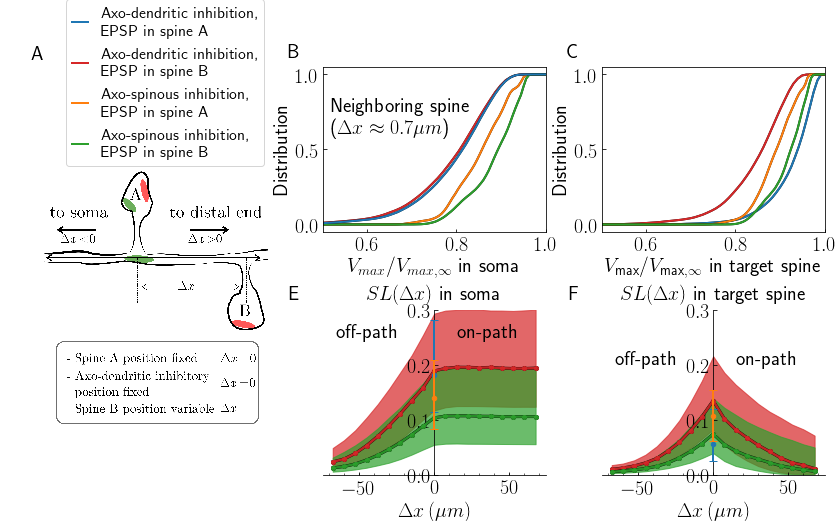

In [42]:
im = Image.open('../dendintej.png')

fig = figure(figsize=(14,7.5))
gs = mpl.gridspec.GridSpec(2, 3,  wspace=0.25, hspace=0.47) # 2x3 grid
ax0 = fig.add_subplot(gs[:, 0]) # first full col
ax2 = fig.add_subplot(gs[0, 1]) # first row, second col
ax1 = fig.add_subplot(gs[0, 2]) # first row, third col
ax4 = fig.add_subplot(gs[1, 1]) # 2nd row, second col
ax3 = fig.add_subplot(gs[1, 2]) # 2nd row, 3rd col
#axl1 = fig.add_subplot(gs[1, 0]) # lower row, 1st col

color = 'C3'
xt = -arange(0,10)*7.5
#axl1.fill_between(xt,mt-mts,mt+mts,alpha=0.9,color=color)
#axl1.plot(xt,mt,'k.-',linewidth=2)
#axl1.plot(xt,mt,color+'.-',label='Excitatory EPSP\n $V_{max}(\Delta x)/V_{max}(0)$',linewidth=2)
#axl1.fill_between(-xt,mtn-mtsn,mtn+mtsn,color=color,alpha=0.9)
#axl1.plot(-xt,mtn,'k.-',linewidth=2)
#axl1.plot(-xt,mtn,color+'.-',linewidth=2)

axsp = 1
lab = 'Vspine'
color = 'C2'
#axl1.plot(shleh0[lab][:,0],shleh0[lab][:,1+axsp*5],'k.-')
#axl1.plot(shleh0[lab][:,0],shleh0[lab][:,1+axsp*5],color+'.-',label='Axo-spinous inhibitory shunt\n $SL(\Delta x)/SL(0)$')
#axl1.fill_between(shleh0[lab][:,0],shleh0[lab][:,2+axsp*5],shleh0[lab][:,3+axsp*5],color=color,alpha=0.7)
#axl1.set_ylim(0,1.05)
#axl1.spines['left'].set_position(('data',0.0))
#axl1.spines['top'].set_color('none')
#axl1.spines['right'].set_color('none')
#axl1.set_xlabel('$\Delta x\, (\mu m)$')

ax0.imshow(im)
ax0.set_axis_off()

#h2 = ax2.hist(fapSf[:,1]/fapSf[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
#ht = ax2.hist(fapSf[:,2]/fapSf[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)
h2 = histogram(fapSf[:,1]/fapSf[:,0],51)
ht = histogram(fapSf[:,2]/fapSf[:,0],51)
ht2 = histogram(fapSf[:,5]/fapSf[:,3],51)
ht3 = histogram(fapSf[:,4]/fapSf[:,3],51)

myl = max([h2[0].max(),ht[0].max()])

mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))
myl = 1.0

color0 = 'C3'
htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(h2[0])/sum(h2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax2.plot(htx,hty*myl,'k',linewidth=2)
ax2.plot(htx,hty*myl,color0,linewidth=2)

color0b = 'C1'
htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht2[0])/sum(ht2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax2.plot(htx,hty*myl,'k',linewidth=2)
ax2.plot(htx,hty*myl,color0b,linewidth=2)

color = 'C2'
htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax2.plot(htx,hty*myl,'k',linewidth=2)
ax2.plot(htx,hty*myl,color,linewidth=2)

color2= 'C0'
htx = ht3[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht3[0])/sum(ht3[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax2.plot(htx,hty*myl,'k',linewidth=2)
ax2.plot(htx,hty*myl,color2,linewidth=2)

#h2 = ax1.hist(fap0f[:,1]/fap0f[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
#ht = ax1.hist(fap0f[:,2]/fap0f[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)
h2 = histogram(fap0f[:,1]/fap0f[:,0],51)
ht = histogram(fap0f[:,2]/fap0f[:,0],51)
ht2 = histogram(fap0f[:,5]/fap0f[:,3],51)
ht3 = histogram(fap0f[:,4]/fap0f[:,3],51)

myl = max([h2[0].max(),ht[0].max()])
mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))
myl = 1.0


htx = ht3[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht3[0])/sum(ht3[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax1.plot(htx,hty*myl,'k',linewidth=2)
ax1.plot(htx,hty*myl,color2,linewidth=2,label='Axo-dendritic inhibition,\nEPSP in spine A')


htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(h2[0])/sum(h2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax1.plot(htx,hty*myl,'k',linewidth=2)
ax1.plot(htx,hty*myl,color0,linewidth=2,label='Axo-dendritic inhibition,\nEPSP in spine B')

htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht2[0])/sum(ht2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax1.plot(htx,hty*myl,'k',linewidth=2)
ax1.plot(htx,hty*myl,color0b,linewidth=2,label='Axo-spinous inhibition,\nEPSP in spine A')


htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
ax1.plot(htx,hty*myl,'k',linewidth=2)
ax1.plot(htx,hty*myl,color,linewidth=2,label='Axo-spinous inhibition,\nEPSP in spine B')


axss = [ax3,ax4]
axsp = 0
# ['Vspine','Vsoma','Vdendrite']
for i,lab in enumerate(['Vspine','Vsoma']):
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],'k.-',linewidth=3,markersize=8)
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],color0+'.-',linewidth=2.5,label='Axo-dendritic\n inhibition',markersize=8,alpha=0.9)
    axss[i].fill_between(shle[lab][:,0],shle[lab][:,2+axsp*5],shle[lab][:,3+axsp*5],alpha=0.7,color = color0)
ax4.spines['left'].set_position(('data',0.0))
ax4.spines['top'].set_color('none')
ax4.spines['right'].set_color('none')
#ax4.set_ylabel('Shunting Level')
ax4.set_xlabel('$\Delta x\, (\mu m)$')
#ax4.legend()

axsp = 1
for i,lab in enumerate(['Vspine','Vsoma']):
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],'k.-',linewidth=3,markersize=8)
    axss[i].plot(shle[lab][:,0],shle[lab][:,1+axsp*5],color+'.-',linewidth=2.5,label='Axo-spinous\n inhibition',markersize=8,alpha=0.9)
    axss[i].fill_between(shle[lab][:,0],shle[lab][:,2+axsp*5],shle[lab][:,3+axsp*5],alpha=0.7,color=color)




ax1.set_xlim(0,1)
ax1.set_ylabel('Distribution')
ax1.set_xlabel('$V_{\sf max}/V_{\sf max, \infty}$ in target spine')

ax2.set_xlim(0.5,1)
ax1.set_xlim(0.5,1)

ax2.set_xlabel('$V_{max}/V_{max, \infty}$ in soma')
ax2.set_ylabel('Distribution')
ax2.annotate('Neighboring spine\n ($\Delta x\\approx0.7 \mu m$)',xy = (0.52,0.6))

ax2.tick_params(which='major',direction='in')
ax4.tick_params(which='major',direction='in')
#ax3.tick_params(which='major',direction='in')
ax1.tick_params(which='major',direction='in')
#axl1.tick_params(which='major',direction='in')
ax3.tick_params(which='major',direction='in')

ax3.spines['left'].set_position(('data',0.0))
ax3.spines['top'].set_color('none')
ax3.spines['right'].set_color('none')
ax3.set_xlabel('$\Delta x\,(\mu m)$')
yloc_offonpath = 0.21 
ax3.annotate('off-path',xy = (-65,0.20))
ax3.annotate('on-path',xy = (15,0.20))
#ax4.set_ylabel('$(V_{\sf max, \infty}-V_{\sf max})/V_{\sf max, \infty}$',rotation=0)
ax4.set_ylabel('$SL(\Delta x)$ in soma',rotation=0)
ax4.yaxis.set_label_coords(0.5,1.03)
#ax3.set_ylabel('$(V_{\sf max, \infty}-V_{\sf max})/V_{\sf max, \infty}$',rotation=0)
ax3.set_ylabel('$SL(\Delta x)$ in target spine',rotation=0)
ax3.yaxis.set_label_coords(0.5,1.03)
ax4.set_ylim(0,0.3)
ax3.set_ylim(0,0.3)
ax4.annotate('off-path',xy = (-65,0.25))
ax4.annotate('on-path',xy = (15,0.25))

axl1.xaxis.set_minor_locator(FixedLocator(arange(-100,100,10)))
ax3.xaxis.set_minor_locator(FixedLocator(arange(-100,100,10)))
axl1.tick_params(which='minor',direction='in')
ax3.tick_params(which='minor',direction='in')
ax4.xaxis.set_minor_locator(FixedLocator(arange(-100,100,10)))
ax4.tick_params(which='minor',direction='in')

#ax3.legend(loc = (-0.28,0.4))
#axl1.legend(loc = (0.,1.07),frameon=False)
ax1.legend(loc=(-2.4,0.4))

temp = 1-fapSf[:,5]/fapSf[:,3]
temp.sort()
sh = temp.shape[0]
nmed = sh//2
nl1, nv1 = int(sh*0.16),int(sh*(1-0.16))
yerr = abs(array([[temp[nl1]],[temp[nv1]]])-temp[nmed])
ax4.errorbar(0.0,temp[nmed],yerr,fmt='.',zorder=4,capsize=4,color=color0b,elinewidth=2,barsabove=True,markersize=9)
temp = 1-fap0f[:,5]/fap0f[:,3]
temp.sort()
sh = temp.shape[0]
nmed = sh//2
nl1, nv1 = int(sh*0.16),int(sh*(1-0.16))
yerr = abs(array([[temp[nl1]],[temp[nv1]]])-temp[nmed])
ax3.errorbar(0.0,temp[nmed],yerr,fmt='.',zorder=4,capsize=4,color=color0b,elinewidth=2,barsabove=True,markersize=9)

temp = 1-fapSf[:,4]/fapSf[:,3]
temp.sort()
sh = temp.shape[0]
nmed = sh//2
nl1, nv1 = int(sh*0.16),int(sh*(1-0.16))
yerr = abs(array([[temp[nl1]],[temp[nv1]]])-temp[nmed])
ax4.errorbar(0.0,temp[nmed],yerr,fmt='.',zorder=3,capsize=4,color=color2,elinewidth=2,barsabove=True,markersize=9)
temp = 1-fap0f[:,4]/fap0f[:,3]
temp.sort()
sh = temp.shape[0]
nmed = sh//2
nl1, nv1 = int(sh*0.16),int(sh*(1-0.16))
yerr = abs(array([[temp[nl1]],[temp[nv1]]])-temp[nmed])
ax3.errorbar(0.0,temp[nmed],yerr,fmt='.',zorder=3,capsize=4,color=color2,elinewidth=2,barsabove=True,markersize=9)



#ax4.annotate('In soma',xy = (10,0.32))
#ax3.annotate('In spine head',xy = (10,0.320))

axs = [ax0,ax2,ax1,axl1,ax4,ax3]

pos = zeros((len(axs),2))
pos[:,1] = 1-pos[:,1]

pos[:,:] = (-0.1,1.15)

pos[0,:] = (0.,1.175)
pos[3,:] = (0.,1.15)
numbering_panels(axs,pos)

savefig('f3x2.png',dpi = 300,tight_layout = True)


(166.0738741196361, 156.56757372566383)
(25000, 6)
0.07928463571587108
0.06767642295659537
-0.03750278813823715


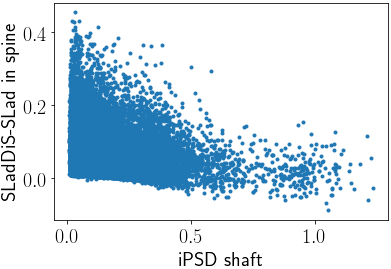

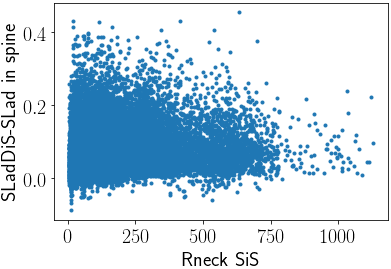

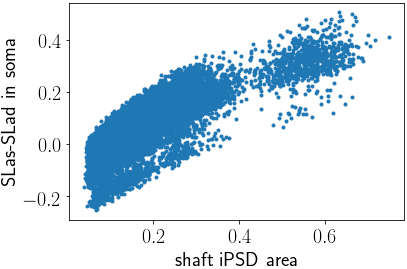

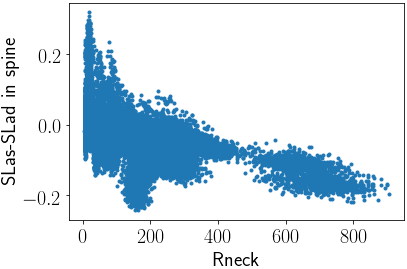

In [111]:
figure()
plot(fdatf[:,2],(fap0f[:,4]/fap0f[:,3]-fap0f[:,1]/fap0f[:,0]),'.')
xlabel('iPSD shaft')
ylabel('SLadDiS-SLad in spine')
figure()
plot(fdatf[:,5],(fap0f[:,4]/fap0f[:,3]-fap0f[:,1]/fap0f[:,0]),'.')
ylabel('SLadDiS-SLad in spine')
rr = fdatf[:,4].std(),fdatf[:,5].std()
print(rr)
#print(fdatf[rr>40,5][:],fdatf[rr>40,4][:])
xlabel('Rneck SiS')
figure()
plot(fdatf[:,3],(fapSf[:,5]/fapSf[:,3]-fapSf[:,4]/fapSf[:,3]),'.')
xlabel('shaft iPSD area')
ylabel('SLas-SLad in soma')
figure()
plot(fdatf[:,4],(fap0f[:,5]/fap0f[:,3]-fap0f[:,4]/fap0f[:,3]),'.')
xlabel('Rneck')
ylabel('SLas-SLad in spine')
print(fdatf.shape)
print((fap0f[:,4]/fap0f[:,3]).mean()-(fap0f[:,1]/fap0f[:,0]).mean())
print((fap0f[:,2]/fap0f[:,0]).mean()-(fap0f[:,1]/fap0f[:,0]).mean())
print((fap0f[:,5]/fap0f[:,3]).mean()-(fap0f[:,4]/fap0f[:,3]).mean())

In [28]:
lab='Vspine'
axsp = 1 # axo-spinous
xt,yt = shle[lab][:,0],shle[lab][:,1+axsp*5]
sel = xt>=0
par = polyfit(xt[sel],log(yt[sel]),1)
print(-1.0/par[0])
sel = xt<=0
par = polyfit(abs(xt[sel]),log(yt[sel]),1)
print(-1.0/par[0])

axsp = 0 # axo-dendritic
xt,yt = shle[lab][:,0],shle[lab][:,1+axsp*5]
sel = xt>=0
par = polyfit(xt[sel],log(yt[sel]),1)
print(-1.0/par[0])
sel = xt<=0
par = polyfit(abs(xt[sel]),log(yt[sel]),1)
print(-1.0/par[0])
#print(xt,yt)

27.88668330043072
24.424532862962845
27.944822283964836
24.458759778426305


In [139]:
temp = 1-fapSf[:,5]/fapSf[:,3]
temp.sort()
sh = temp.shape[0]
nmed = sh//2
nl1, nv1 = int(sh*0.16),int(sh*(1-0.16))
print(temp[nmed],temp[nl1],temp[nv1])
temp = 1-fap0f[:,5]/fap0f[:,3]
temp.sort()
sh = temp.shape[0]
nmed = sh//2
nl1, nv1 = int(sh*0.16),int(sh*(1-0.16))
print(temp[nmed],temp[nl1],temp[nv1])

0.1395349195427401 0.08284622608174264 0.20919604803311476
0.10593831016894106 0.060469570488536184 0.15375555905387894


0.8854699454310783 0.8555628834297035


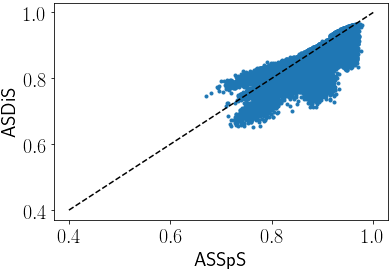

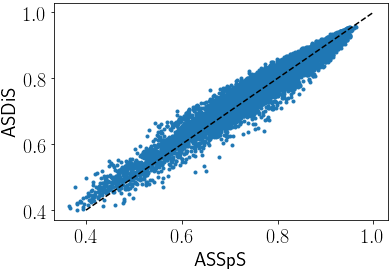

In [82]:
plot(fapSf[:,2]/fapSf[:,0],fapSf[:,5]/fapSf[:,3],'.')
print((fapSf[:,2]/fapSf[:,0]).mean(),(fapSf[:,5]/fapSf[:,3]).mean())
xlabel('ASSpS')
ylabel('ASDiS')
xs = linspace(0.4,1.,10)
plot(xs,xs,'k--')
figure()
plot(fapSf[:,1]/fapSf[:,0],fapSf[:,4]/fapSf[:,3],'.')
xlabel('ASSpS')
ylabel('ASDiS')
xs = linspace(0.4,1.,10)
plot(xs,xs,'k--')

(25000, 6)
0.896026082226089 0.8604872160850078 0.8132006615834348 0.8191282327287502
0.9262461829358195 0.8940633619743504 0.8132006615834348 0.8191282327287502


0.025894575378961494

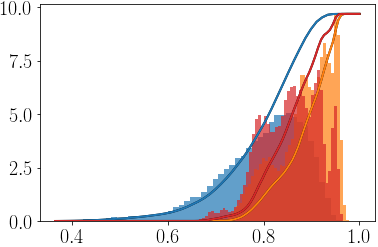

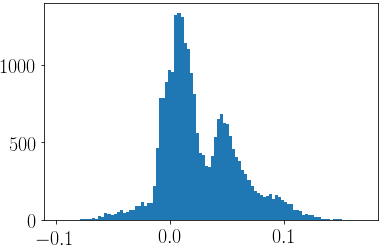

In [111]:
print(fapDf.shape)
h2 = hist(fapSf[:,1]/fapSf[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
ht = hist(fapSf[:,2]/fapSf[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)

#h2 = hist(fapDf[:,4]/fapDf[:,3],51,alpha=0.7,label='A-D',color = 'C2',density=True)
ht2 = hist(fapSf[:,5]/fapSf[:,3],51,label='A-S',color = 'C3',density=True,alpha=0.7)

myl = max([h2[0].max(),ht[0].max()])

mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))

htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(h2[0])/sum(h2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C0',linewidth=2)


htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C1',linewidth=2)

htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht2[0])/sum(ht2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C3',linewidth=2)

medAS = fapSf[:,5]/fapSf[:,3]
med2sp = fapSf[:,2]/fapSf[:,0]
dmaxs = med2sp-medAS

medAS.sort()
medDiSAD = fapSf[:,4]/fapSf[:,3]
medDiSAD.sort()
medAD = fapSf[:,1]/fapSf[:,0]
medAD.sort()

med2sp.sort()
nmed = med2sp.shape[0]//2
print(med2sp[nmed],medAS[nmed],medAD[nmed],medDiSAD[nmed])


medAS = fap0f[:,5]/fap0f[:,3]
med2sp = fap0f[:,2]/fap0f[:,0]
dmaxs = med2sp-medAS

medAS.sort()
medDiSAD = fapSf[:,4]/fapSf[:,3]
medDiSAD.sort()
medAD = fapSf[:,1]/fapSf[:,0]
medAD.sort()

med2sp.sort()
nmed = med2sp.shape[0]//2
print(med2sp[nmed],medAS[nmed],medAD[nmed],medDiSAD[nmed])
figure()
h = hist(dmaxs,100)
dmaxs.sort()
dmaxs.mean()

In [112]:
0.9262461829358195-0.8940633619743504

0.03218282096146907

(500, 6)
0.8965981169856031 0.8591310524644493 0.8224984979878023 0.8290461180109078


0.02972408607134419

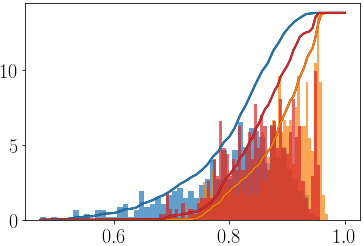

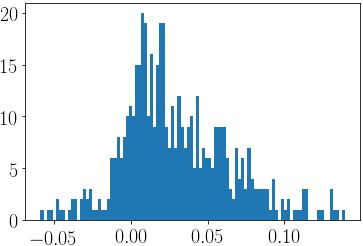

In [157]:
with open("gatinginfo_f_bRn_tempx2.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
    
print(fapDf.shape)
h2 = hist(fapSf[:,1]/fapSf[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
ht = hist(fapSf[:,2]/fapSf[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)

#h2 = hist(fapDf[:,4]/fapDf[:,3],51,alpha=0.7,label='A-D',color = 'C2',density=True)
ht2 = hist(fapSf[:,5]/fapSf[:,3],51,label='A-S',color = 'C3',density=True,alpha=0.7)

myl = max([h2[0].max(),ht[0].max()])

mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))

htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(h2[0])/sum(h2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C0',linewidth=2)


htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C1',linewidth=2)

htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht2[0])/sum(ht2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C3',linewidth=2)

medAS = fapSf[:,5]/fapSf[:,3]
med2sp = fapSf[:,2]/fapSf[:,0]
dmaxs = med2sp-medAS

medAS.sort()
medDiSAD = fapSf[:,4]/fapSf[:,3]
medDiSAD.sort()
medAD = fapSf[:,1]/fapSf[:,0]
medAD.sort()

med2sp.sort()
nmed = med2sp.shape[0]//2
print(med2sp[nmed],medAS[nmed],medAD[nmed],medDiSAD[nmed])
figure()
h = hist(dmaxs,100)
dmaxs.sort()
dmaxs.mean()

(500, 6)
0.8674480881050555 0.9017686494410869 0.7709234643449948 0.9126801997914598


-0.05796664671387342

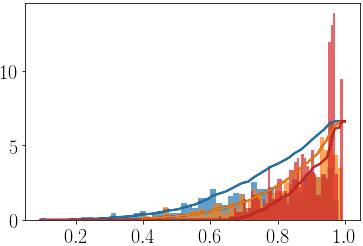

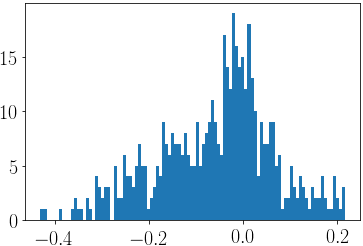

In [158]:
with open("gatinginfo_f_bRn_tempx2.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
    
print(fapDf.shape)
h2 = hist(fapCf[:,1]/fapCf[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
ht = hist(fapCf[:,2]/fapCf[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)

#h2 = hist(fapDf[:,4]/fapDf[:,3],51,alpha=0.7,label='A-D',color = 'C2',density=True)
ht2 = hist(fapCf[:,5]/fapCf[:,3],51,label='A-S',color = 'C3',density=True,alpha=0.7)

myl = max([h2[0].max(),ht[0].max()])

mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))

htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(h2[0])/sum(h2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C0',linewidth=2)


htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C1',linewidth=2)

htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht2[0])/sum(ht2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C3',linewidth=2)

medAS = fapCf[:,5]/fapCf[:,3]
med2sp = fapCf[:,2]/fapCf[:,0]
dmaxs = med2sp-medAS

medAS.sort()
medDiSAD = fapCf[:,4]/fapCf[:,3]
medDiSAD.sort()
medAD = fapCf[:,1]/fapCf[:,0]
medAD.sort()

med2sp.sort()
nmed = med2sp.shape[0]//2
print(med2sp[nmed],medAS[nmed],medAD[nmed],medDiSAD[nmed])
figure()
h = hist(dmaxs,100)
dmaxs.sort()
dmaxs.mean()

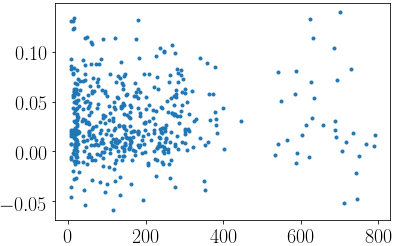

In [156]:
plot(fdatf[:,4],dmaxs,'.')


In [140]:
print(fapDf.shape)
h2 = hist(fapDh[:,1]/fapDh[:,0],51,alpha=0.7,label='A-D',color = 'C0',density=True)
ht = hist(fapDh[:,2]/fapDh[:,0],51,label='A-S',color = 'C1',density=True,alpha=0.7)

#h2 = hist(fapDf[:,4]/fapDf[:,3],51,alpha=0.7,label='A-D',color = 'C2',density=True)
ht2 = hist(fapDh[:,5]/fapDh[:,3],51,label='A-S',color = 'C3',density=True,alpha=0.7)

myl = max([h2[0].max(),ht[0].max()])

mxl = (min(h2[1].min(),ht[1].min()),max(h2[1].max(),ht[1].max()))

htx = h2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(h2[0])/sum(h2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C0',linewidth=2)


htx = ht[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht[0])/sum(ht[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C1',linewidth=2)

htx = ht2[1]; htx = (htx[1:]+htx[:-1])*0.5
hty = cumsum(ht2[0])/sum(ht2[0])
htx = concatenate(([mxl[0]],htx,[1.0]))
hty = concatenate(([0],hty,[1.0]))
plot(htx,hty*myl,'k',linewidth=2)
plot(htx,hty*myl,'C3',linewidth=2)

medAS = fapDh[:,5]/fapDh[:,3]
medAS.sort()
medAD = fapDh[:,1]/fapDh[:,0]
medAD.sort()
med2sp = fapDh[:,2]/fapDh[:,0]
med2sp.sort()
nmed = med2sp.shape[0]//2
print(med2sp[nmed],medAS[nmed],medAD[nmed])


(500, 6)


NameError: name 'fapDh' is not defined

In [51]:
with open("gatinginfo_f_bRn_temp.pickle","rb") as f:
    fapSf1,fapDf1,fap0f1,fapCf1,fdatf1 = pickle.load(f)

Text(0.5, 0, '$V_{soma}$: 2nd sp exc+AS inh')

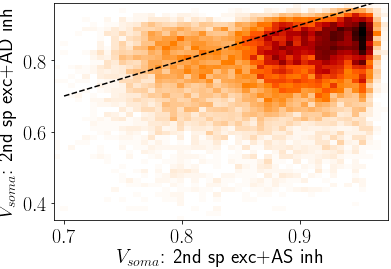

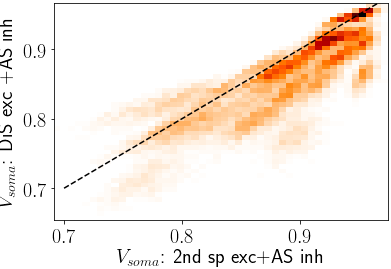

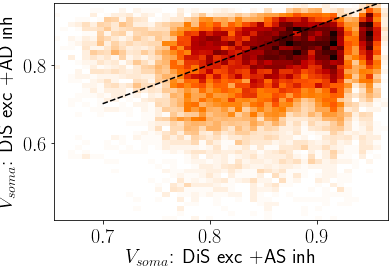

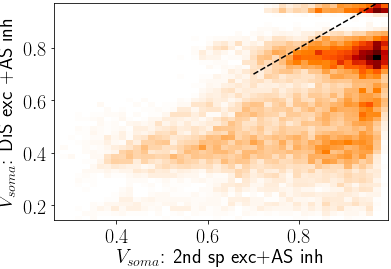

In [135]:
sel = permutation(arange(fapDf.shape[0]))#[:1500]
yt,xt = fapSf[sel,1]/fapSf[sel,0],fapSf[sel,2]/fapSf[sel,0]
#scatter(fapDh[sel,2]/fapDh[sel,0],fapDh[sel,1]/fapDh[sel,0],alpha=0.3)
#scatter(xt,yt,alpha=0.3)
counts,ybins,xbins,image = hist2d(xt,yt,46,cmap='gist_heat_r')
#contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=2)
plot(linspace(0.7,1),linspace(0.7,1),'k--')
ylabel('$V_{soma}$: 2nd sp exc+AD inh')
xlabel('$V_{soma}$: 2nd sp exc+AS inh')

figure()
yt,xt = fapSf[sel,5]/fapSf[sel,3],fapSf[sel,2]/fapSf[sel,0]
#scatter(fapDh[sel,2]/fapDh[sel,0],fapDh[sel,1]/fapDh[sel,0],alpha=0.3)
#scatter(xt,yt,alpha=0.3)
counts,ybins,xbins,image = hist2d(xt,yt,46,cmap='gist_heat_r')
#contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=2)
plot(linspace(0.7,1),linspace(0.7,1),'k--')
ylabel('$V_{soma}$: DiS exc   +AS inh')
xlabel('$V_{soma}$: 2nd sp exc+AS inh')

figure()
yt,xt = fapSf[sel,4]/fapSf[sel,3],fapSf[sel,5]/fapSf[sel,3]
#scatter(fapDh[sel,2]/fapDh[sel,0],fapDh[sel,1]/fapDh[sel,0],alpha=0.3)
#scatter(xt,yt,alpha=0.3)
counts,ybins,xbins,image = hist2d(xt,yt,46,cmap='gist_heat_r')
#contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=2)
plot(linspace(0.7,1),linspace(0.7,1),'k--')
ylabel('$V_{soma}$: DiS exc +AD inh')
xlabel('$V_{soma}$: DiS exc +AS inh')

figure()
yt,xt = fapCf[sel,5]/fapCf[sel,3],fapCf[sel,2]/fapCf[sel,0]
#scatter(fapDh[sel,2]/fapDh[sel,0],fapDh[sel,1]/fapDh[sel,0],alpha=0.3)
#scatter(xt,yt,alpha=0.3)
counts,ybins,xbins,image = hist2d(xt,yt,46,cmap='gist_heat_r')
#contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=2)
plot(linspace(0.7,1),linspace(0.7,1),'k--')
ylabel('$V_{soma}$: DiS exc   +AS inh')
xlabel('$V_{soma}$: 2nd sp exc+AS inh')

#figure()
#title('Rneck*2')
#yt,xt = fapDf1[:,5]/fapDf1[:,3],fapDf1[:,2]/fapDf1[:,0]
##scatter(fapDh[sel,2]/fapDh[sel,0],fapDh[sel,1]/fapDh[sel,0],alpha=0.3)
##scatter(xt,yt,alpha=0.3)
#counts,ybins,xbins,image = hist2d(xt,yt,46,cmap='gist_heat_r')
##contour(counts,extent=[xbins.min(),xbins.max(),ybins.min(),ybins.max()],linewidths=2)
#plot(linspace(0.7,1),linspace(0.7,1),'k--')
#ylabel('$V_D$: DiS exc   +AS inh')
#xlabel('$V_D$: 2nd sp exc+AS inh')

In [122]:
axsp = 1
lab = 'Vspine'
# : $ShntI/ShntI_0$
sel = shleh0[lab][:,1+axsp*5]>exp(-2)
print(exp(-1))
column_stack((shleh0[lab][sel,0],shleh0[lab][sel,1+axsp*5]))


0.36787944117144233


array([[-37.5       ,   0.1599462 ],
       [-30.        ,   0.24325957],
       [-22.5       ,   0.3633654 ],
       [-15.        ,   0.52851841],
       [ -7.5       ,   0.7385429 ],
       [  0.        ,   1.        ],
       [  7.5       ,   0.74343892],
       [ 15.        ,   0.55253843],
       [ 22.5       ,   0.4207566 ],
       [ 30.        ,   0.32600692],
       [ 37.5       ,   0.23661338],
       [ 45.        ,   0.16266146]])

2.233031721114037 1.6057627532946321 0.0007176889079238968 0.727798361731033
5.482868973357116 2.113140178459555 -0.3920236856467585 0.23178173770359903


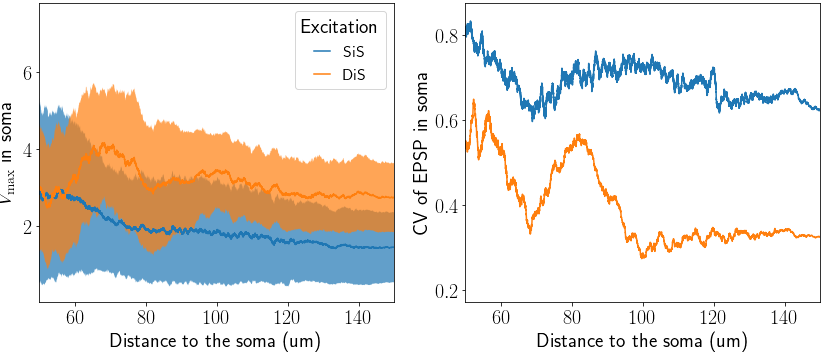

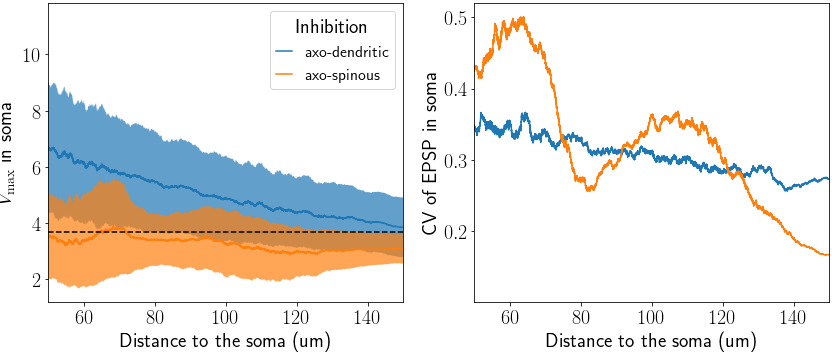

In [124]:
sel = mVs[:,-2] == 1
mVav = mVs[:,2].mean()
s1 = permutation(arange(mVs.shape[0])[sel])
s2 = permutation(arange(mVs.shape[0])[~sel])

fig = figure(figsize=(14,5.5))

fig.add_subplot(121)
xt,yt = mVs[s1,-1],mVs[s1,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
n = 800
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt,label='SiS')
fill_between(xt,yt+yt2,yt-yt2,alpha=0.7)


xt,yt = mVs[s2,-1],mVs[s2,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
n = 200
xt = running_mean(xt,n)
yt2 = running_std(yt,n)

yt = running_mean(yt,n)
plot(xt,yt,label='DiS')
legend(title='Excitation')
ylabel('$V_{\max}$ in soma')
xlabel('Distance to the soma (um)')
fill_between(xt,yt+yt2,yt-yt2,alpha=0.7)

xlim(50,150)
fig.add_subplot(122)
xt,yt = mVs[s1,-1],mVs[s1,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
n = 800
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt2/yt,label='SiS')


xt,yt = mVs[s2,-1],mVs[s2,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
n = 200
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt2/yt,label='DiS')
ylabel('CV of EPSP in soma')
xlabel('Distance to the soma (um)')

xlim(50,150)
fig = figure(figsize=(14,5.5))

fig.add_subplot(121)
print(mVav,mVs[:,2].std(), mVs[~sel,2].mean()/mVav-1, mVs[~sel,2].std()/mVav)

mVav = mVIs[:,5].mean()
s1 = arange(mVIs.shape[0])
h = axl3.scatter(mVIs[s1,-1],mVIs[s1,5],marker='.',label='axo-dendritic',alpha=0.3)
axl3.scatter(mVIs[s1,-1],mVIs[s1,2],marker='.',label='axo-spinous',alpha=0.3)

xt,yt = mVIs[:,-1],mVIs[:,5]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
n = 800
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt,label='axo-dendritic')
fill_between(xt,yt+yt2,yt-yt2,alpha=0.7)

xt,yt = mVIs[:,-1],mVIs[:,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt,label='axo-spinous')
legend(title='Inhibition')
ylabel('$V_{\max}$ in soma')
xlabel('Distance to the soma (um)')
fill_between(xt,yt+yt2,yt-yt2,alpha=0.7)
plot(linspace(50,150),linspace(50,150)*0+3.7,'k--')
xlim(50,150)
fig.add_subplot(122)
xt,yt = mVIs[:,-1],mVIs[:,5]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt2/yt,label='SiS')


xt,yt = mVIs[:,-1],mVIs[:,2]
sel = xt.argsort(); xt = xt[sel]; yt = yt[sel]
xt = running_mean(xt,n)
yt2 = running_std(yt,n)
yt = running_mean(yt,n)
plot(xt,yt2/yt,label='DiS')
ylabel('CV of EPSP in soma')
xlabel('Distance to the soma (um)')

xlim(50,150)
print(mVav,mVIs[:,5].std(), mVIs[:,2].mean()/mVav-1, mVIs[:,2].std()/mVav)

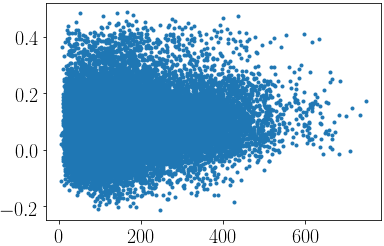

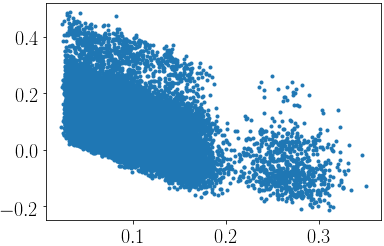

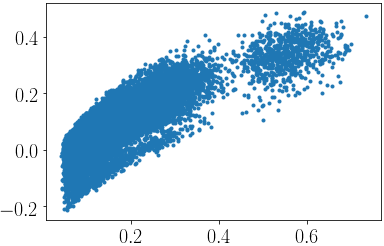

In [195]:
plot(fdatf[:,5]+fdatf[:,4],(fap0f[:,2]-fap0f[:,1])/fap0f[:,0],'.')
figure()
plot(fdatf[:,1],(fap0f[:,2]-fap0f[:,1])/fap0f[:,0],'.')
figure()
plot(fdatf[:,3],(fap0f[:,2]-fap0f[:,1])/fap0f[:,0],'.')

In [196]:
sc = scatter(fdatf[:,1],fdatf[:,3],c= (fap0f[:,2]-fap0f[:,1])/fap0f[:,0],alpha=0.6,cmap='seismic')
colorbar()
xlabel('A_{iDiS}')
ylabel('A_{iSh}')
sc.set_clim(-0.3, 0.3)
plot(linspace(0,0.35),linspace(0,0.35),'k--')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fad606109d8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

)
No file c9ce4188823ecd80f016c9bda8337627.aux.
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




<Figure size 432x288 with 2 Axes>

In [197]:
#taken from http://chris35wills.github.io/matplotlib_diverging_colorbar/
class MidpointNormalize(matplotlib.colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [198]:
with open("gatinginfo_f.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
x,y,z =fdatf[:,1],fdatf[:,3], (fap0f[:,2]-fap0f[:,1])/fap0f[:,0]
sc = scatter(x,y,c='k',alpha=0.2)
sc = scatter(x,y,c=z,alpha=0.6,cmap='seismic',norm = MidpointNormalize(midpoint = 0., vmin = -0.3, vmax = 0.5))
colorbar()
xlabel('A_{iDiS}')
ylabel('A_{iSh}')
#plot(linspace(0,0.35),0.85*linspace(0,0.35)+0.,'k--')
#plot(linspace(0,0.35),1*linspace(0,0.35)+0.1,'k--')
plot(linspace(0,0.35),1.4*linspace(0,0.35)+0.18,'k--')

triang = matplotlib.tri.Triangulation(x, y)
TR = tricontour(x, y, z, arange(-0.3,0.6,0.1), linewidths=0.5, colors='k')
#clabel(TR, inline=1, fontsize=10)
#tricontourf(x, y, z, arange(-0.3,0.6,0.1))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fad606109d8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




<Figure size 432x288 with 2 Axes>

Interpretation: When they have the same area, inhibition in shaft does slightly more effect ~0.003? than when it is in DiS. To have the same effect, A_{ish} should be 15% smaller (0.85 A_{ish}???!)? To have 0.1 more effect, A_{ish} has to be 0.1 um^2 larger than A_{iDiS}. And to have 0.2 more effect A_{ish} = 1.4 A_{iDiS} + 0.18

In [199]:
with open("gatinginfo_f_cm1.pickle","rb") as f:
    fapSf,fapDf,fap0f,fapCf,fdatf = pickle.load(f)
x,y,z =fdatf[:,1],fdatf[:,3], (fap0f[:,2]-fap0f[:,1])/fap0f[:,0]
sc = scatter(x,y,c='k',alpha=0.2)
sc = scatter(x,y,c=z,alpha=0.6,cmap='seismic',norm = MidpointNormalize(midpoint = 0., vmin = -0.3, vmax = 0.5))
colorbar()
xlabel('A_{iDiS}')
ylabel('A_{iSh}')
plot(linspace(0,0.35),0.85*linspace(0,0.35)+0.,'k--')
plot(linspace(0,0.35),1*linspace(0,0.35)+0.1,'k--')
plot(linspace(0,0.35),1.4*linspace(0,0.35)+0.18,'k--')

triang = matplotlib.tri.Triangulation(x, y)
TR = tricontour(x, y, z, arange(-0.3,0.6,0.1), linewidths=0.5, colors='k')
#clabel(TR, inline=1, fontsize=10)
#tricontourf(x, y, z, arange(-0.3,0.6,0.1))

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fad606109d8> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




RuntimeError: latex was not able to process the following string:
b'A_{iDiS}'

Here is the full report generated by latex:
This is pdfTeX, Version 3.14159265-2.6-1.40.18 (TeX Live 2017/Debian) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode

(/users/bssn/serna/.cache/matplotlib/tex.cache/c9ce4188823ecd80f016c9bda8337627
.tex
LaTeX2e <2017-04-15>
Babel <3.18> and hyphenation patterns for 9 language(s) loaded.
(/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
Document Class: article 2014/09/29 v1.4h Standard LaTeX document class
(/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
(/usr/share/texlive/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
(/usr/share/texlive/texmf-dist/tex/latex/base/inputenc.sty
(/usr/share/texlive/texmf-dist/tex/latex/base/utf8.def
(/usr/share/texlive/texmf-dist/tex/latex/base/t1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ot1enc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/omsenc.dfu)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.dfu)))
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
(/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
(/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifpdf.sty)
(/usr/share/texlive/texmf-dist/tex/generic/oberdiek/ifvtex.sty)
(/usr/share/texlive/texmf-dist/tex/generic/ifxetex/ifxetex.sty)

Package geometry Warning: Over-specification in `h'-direction.
    `width' (5058.9pt) is ignored.


Package geometry Warning: Over-specification in `v'-direction.
    `height' (5058.9pt) is ignored.

) (./c9ce4188823ecd80f016c9bda8337627.aux)
(/usr/share/texlive/texmf-dist/tex/latex/base/ts1cmr.fd)
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.14 \fontsize{20.000000}{25.000000}{\sffamily A_
                                                 {iDiS}}
No pages of output.
Transcript written on c9ce4188823ecd80f016c9bda8337627.log.




<Figure size 432x288 with 2 Axes>